In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from collections import Counter
import string

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv


Based on a Kaggle notebook by

In [2]:
data = pd.read_csv("/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv")

In [3]:
data.head(2)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,93798bc4-f086-4720-b1e8-9f630891c64a,Kyliee Vanzant,Netflix is horrible you have ads now if you're...,1,0,NaN,2024-05-26 21:49:54,NaN
1,bb8336d1-6446-483a-85c9-51b325a0e074,Da doomslayer,"I used to love Netflix, but now it's ridiculou...",1,358,8.115.2 build 6 50688,2024-05-26 21:27:06,8.115.2 build 6 50688


In [4]:
red_palette = sns.color_palette("Reds", 10)

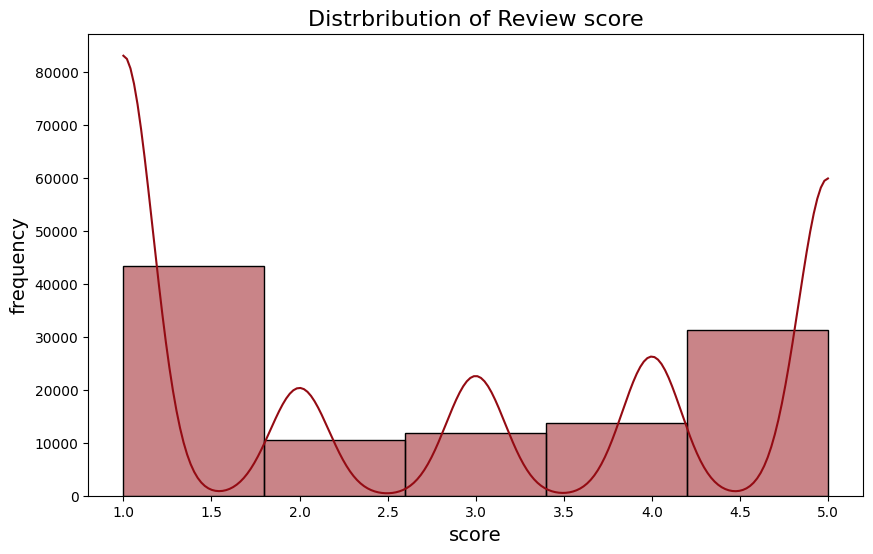

In [5]:
plt.figure(figsize = (10, 6))
sns.histplot(data['score'],bins = 5, kde = True, color = red_palette[-1])
plt.title('Distrbribution of Review score', fontsize=16)
plt.xlabel('score', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.show()

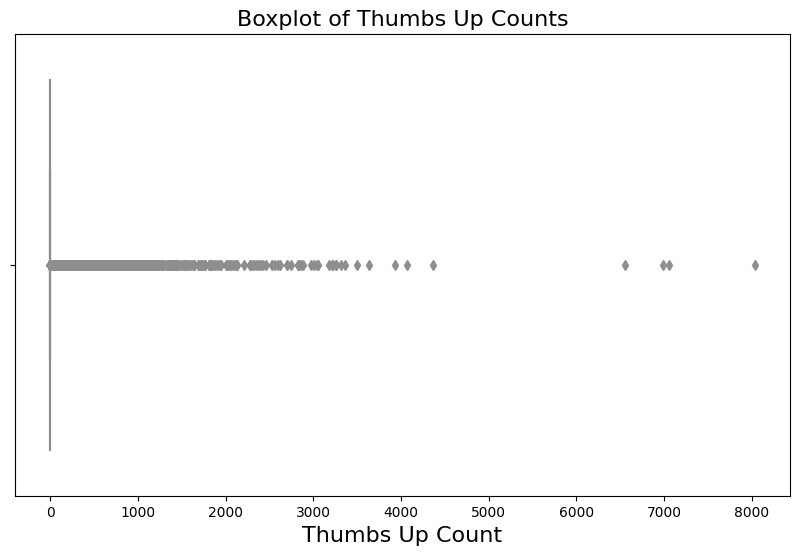

In [6]:
plt.figure(figsize= (10, 6))
sns.boxplot(x=data['thumbsUpCount'], color=red_palette[0])
plt.title('Boxplot of Thumbs Up Counts', fontsize=16)
plt.xlabel('Thumbs Up Count', fontsize=16)
plt.show()

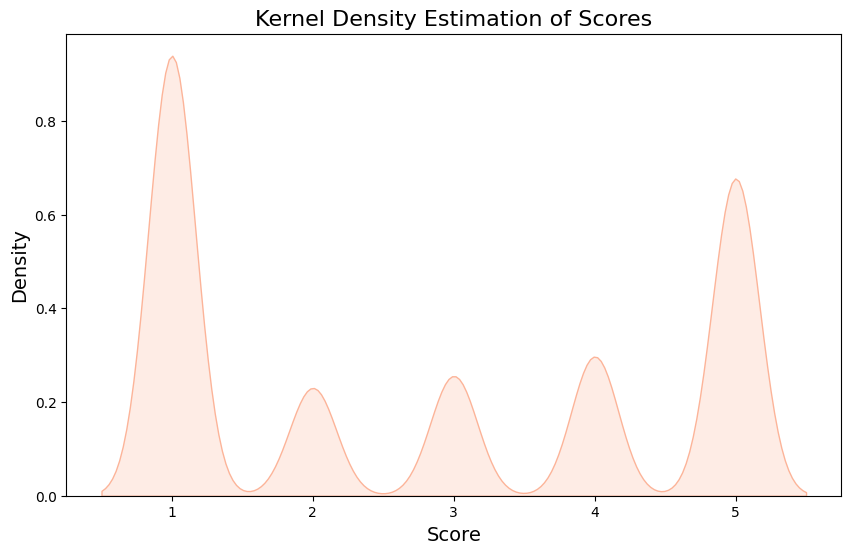

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['score'], shade=True, color=red_palette[2])
plt.title('Kernel Density Estimation of Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

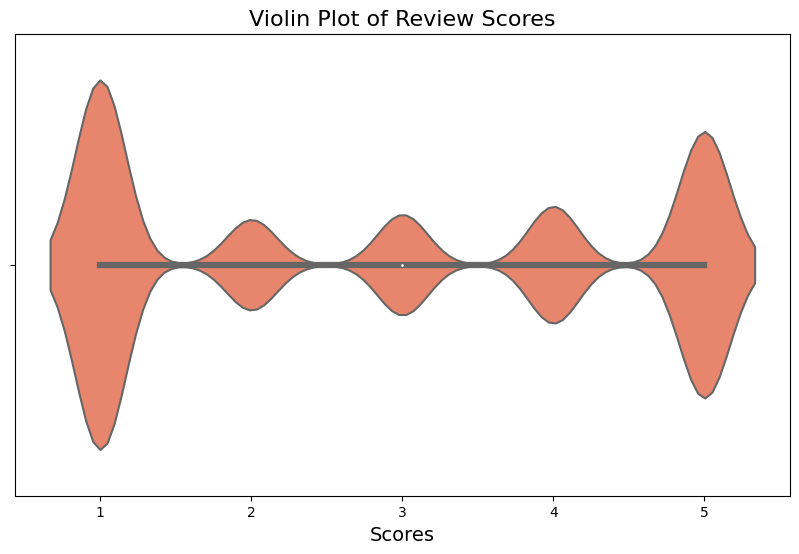

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['score'], color=red_palette[4])
plt.title('Violin Plot of Review Scores', fontsize=16)
plt.xlabel('Scores', fontsize=14)
plt.show()

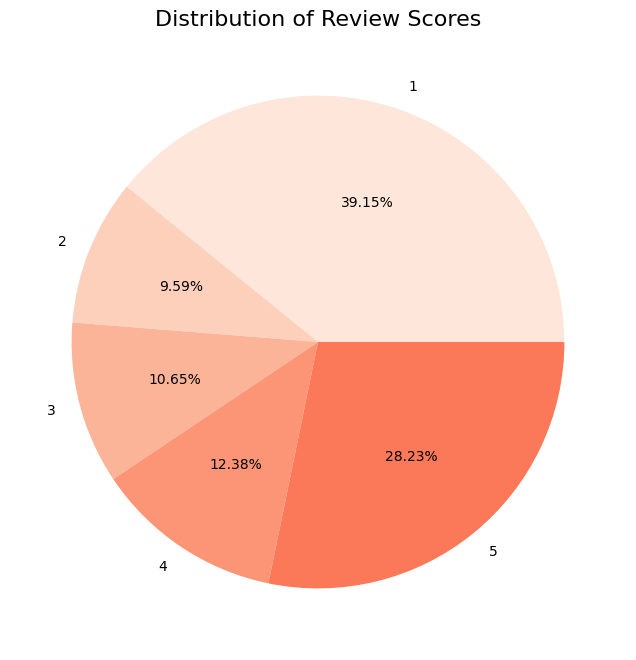

In [9]:
score_counts = data['score'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.2f%%', colors=red_palette)
plt.title('Distribution of Review Scores', fontsize=16)
plt.show()

Has anyone written a review over a period of time? If there are multiple users that wrote before and after a significant update or business decisions, that can help in making future decisions.

In [10]:
data.nunique()

reviewId                110239
userName                 77776
content                 109878
score                        5
thumbsUpCount              899
reviewCreatedVersion       549
at                      110282
appVersion                 549
dtype: int64

There are users that left more than one review.

In [11]:
data.describe()

,score,thumbsUpCount
count,110610.000000,110610.000000
mean,2.809520,10.670473
std,1.696566,101.464777
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [12]:
#data = data.drop_duplicates()
#data.nunique()
data.columns
data['content'] = data['content'].fillna('')


In [13]:
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Split into words
    words = text.split()
    return words

In [14]:
# Apply preprocessing to each review
all_words = []
for review in data['content']:
    words = preprocess(review)
    all_words.extend(words)

    # 3. Count the words
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common()

# Print the most common words
print(most_common_words)

[('the', 117966), ('i', 113903), ('to', 93836), ('and', 89217), ('it', 79635), ('is', 56460), ('a', 50254), ('netflix', 48771), ('app', 48663), ('my', 44378), ('of', 38792), ('but', 37656), ('on', 37435), ('for', 35138), ('this', 34085), ('you', 32688), ('not', 30560), ('in', 29071), ('have', 28654), ('that', 26491), ('movies', 26380), ('its', 26010), ('watch', 25288), ('shows', 19713), ('with', 18423), ('so', 18309), ('good', 17740), ('all', 17357), ('like', 16400), ('are', 16371), ('can', 15728), ('just', 15280), ('they', 15117), ('or', 14717), ('me', 14549), ('cant', 14454), ('when', 14394), ('love', 14065), ('be', 13498), ('if', 12715), ('please', 12417), ('no', 11769), ('dont', 11758), ('great', 11239), ('there', 11055), ('more', 11012), ('even', 10778), ('im', 10428), ('has', 10294), ('only', 10220), ('now', 10184), ('phone', 10134), ('very', 9950), ('was', 9810), ('time', 9488), ('tv', 9379), ('as', 9293), ('your', 9193), ('get', 9169), ('movie', 9072), ('from', 8801), ('series'

In [15]:
# Now decide on what to do with this information.